# Preprocessing V2

In [47]:
import sys
!{sys.executable} -m pip install opencv-python
import cv2
!{sys.executable} -m pip install matplotlib
from matplotlib import pyplot as plt
!{sys.executable} -m pip install numpy
import numpy as np  
from math import atan2, cos, sin, sqrt, pi
from glob import glob
import os

In [48]:
filepaths = glob("images/total/*.png", recursive=True)
print(filepaths[:10])

['images/total/synthes va ex5 at 10.56.45 AM.png', 'images/total/acumed ex3 at 9.58.41 AM.png', 'images/total/synthes va ex1-6 (1).png', 'images/total/synthes va ex5 at 10.57.20 AM.png', 'images/total/Acumed ex2 at 9.50.54 AM.png', 'images/total/synthes va ex3 at 4.31.49 AM.png', 'images/total/acumed ex5 at 10.25.26 AM.png', 'images/total/acumed ex5 at 10.25.57 AM.png', 'images/total/synthes va ex5 at 2.29.37 PM.png', 'images/total/acumed ex5 at 10.25.02 AM.png']


MEAN 49.069346788194444


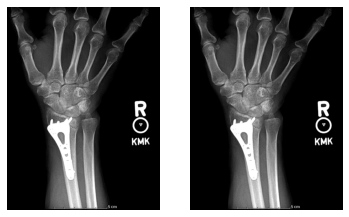

MEAN 71.66106255863329


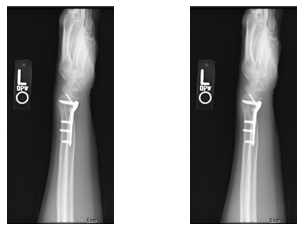

MEAN 178.94374577035867


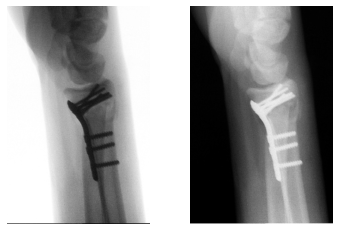

MEAN 49.49053799065318


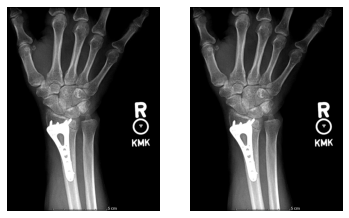

MEAN 47.464348431633766


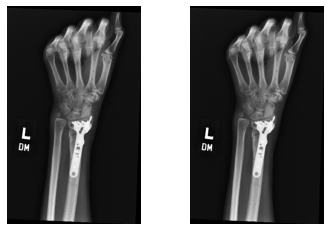

MEAN 57.57011846124662


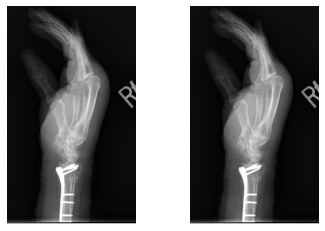

MEAN 79.06005797101449


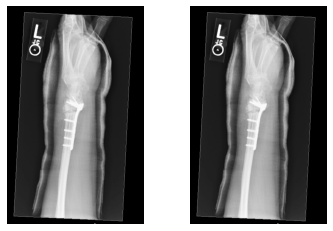

MEAN 52.197706180344476


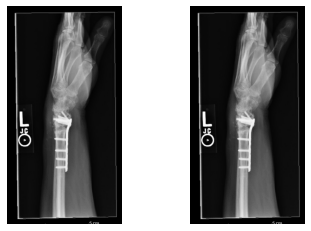

MEAN 118.55977538944572


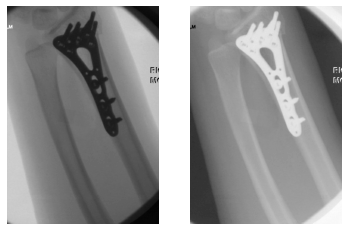

MEAN 45.25636457596693


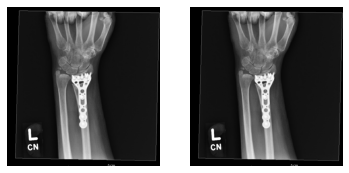

MEAN 69.93497710596394


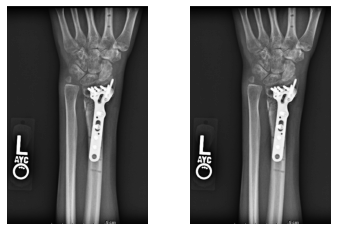

MEAN 72.76037338801058


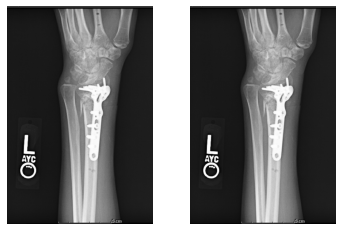

MEAN 83.51599122807018


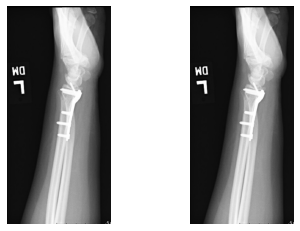

MEAN 139.02450432206976


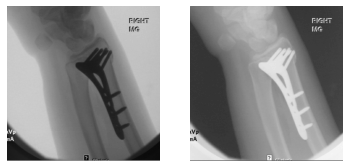

MEAN 70.76857627368577


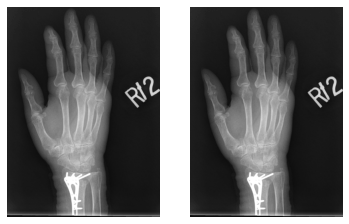

MEAN 85.66709515159984


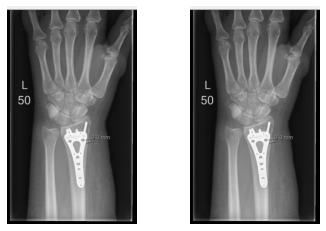

MEAN 96.5423557915506


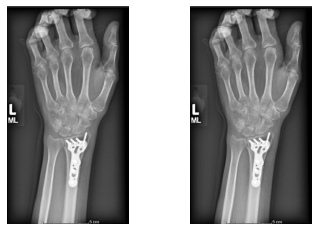

MEAN 99.05386576677915


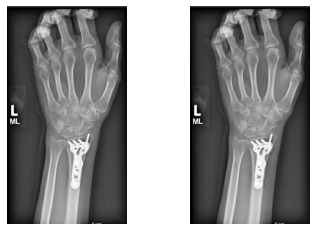

MEAN 48.55787410572681


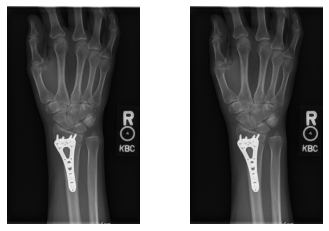

MEAN 74.42411342305834


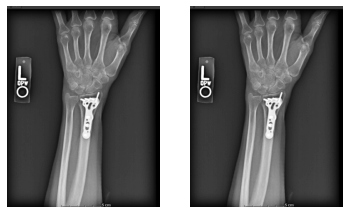

MEAN 75.8442581775701


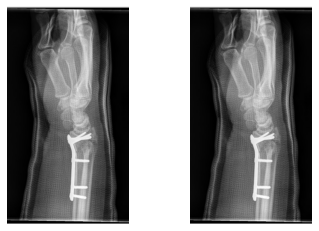

MEAN 163.9176463707083


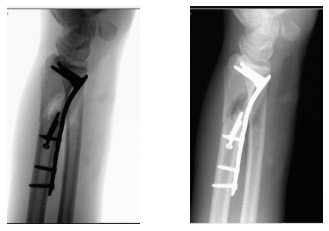

MEAN 138.82100909842845


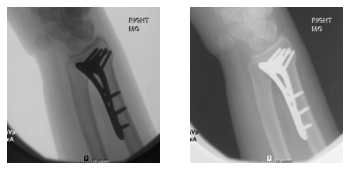

MEAN 40.785417037961146


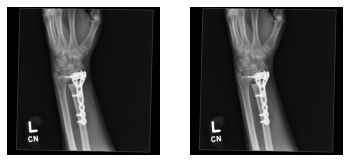

MEAN 121.8106765870107


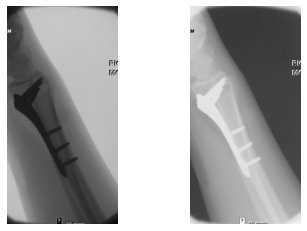

MEAN 72.26280747560808


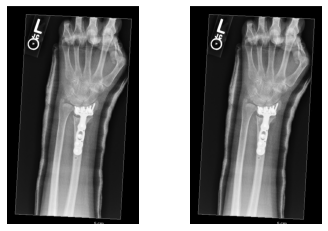

MEAN 177.51479841411378


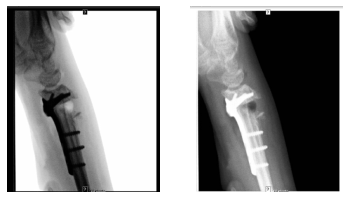

MEAN 161.18121625661678


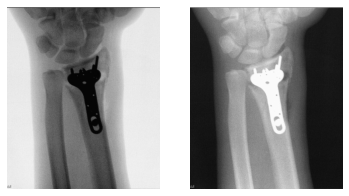

MEAN 70.33441431862485


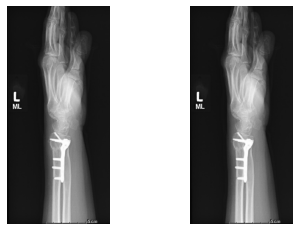

MEAN 63.34211334664414


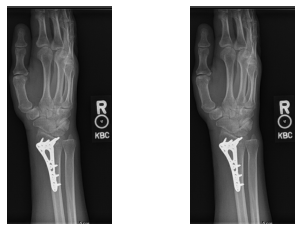

MEAN 76.27631393337343


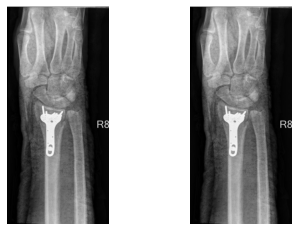

MEAN 63.80674465680613


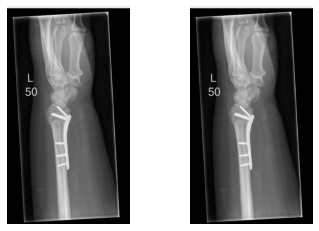

MEAN 73.40293190948684


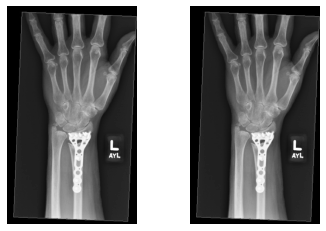

MEAN 57.295394736842105


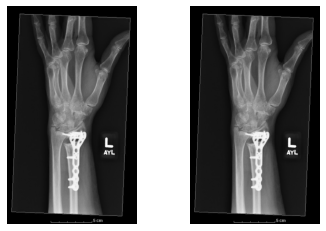

MEAN 42.368489234342896


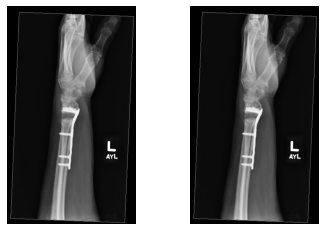

MEAN 73.7095943400008


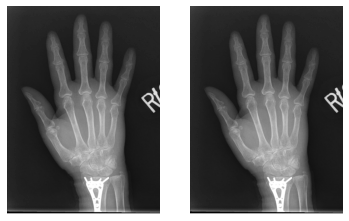

MEAN 69.27478787095663


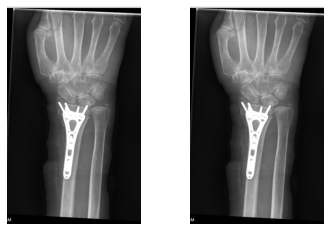

MEAN 51.4917335653736


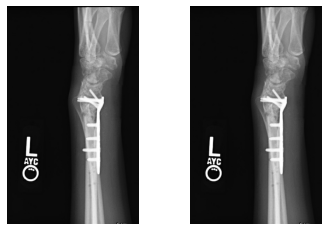

MEAN 67.27501686976541


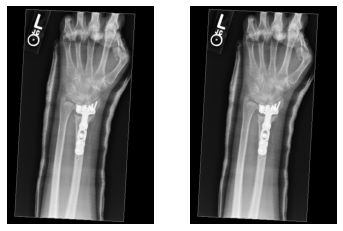

MEAN 201.86113615317154


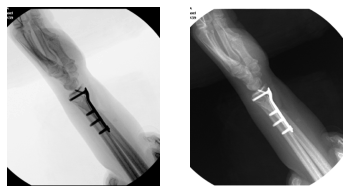

MEAN 72.13760683760684


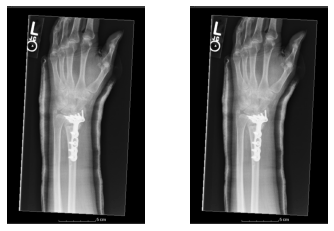

MEAN 48.88936282546475


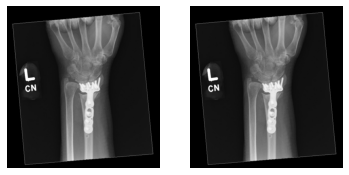

MEAN 32.29734140080675


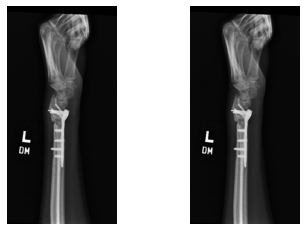

MEAN 132.2998369818351


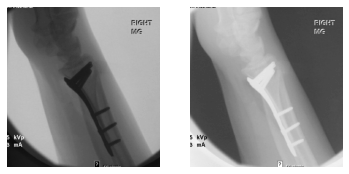

MEAN 110.14395277493725


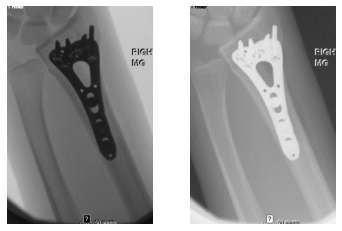

MEAN 64.15045325142343


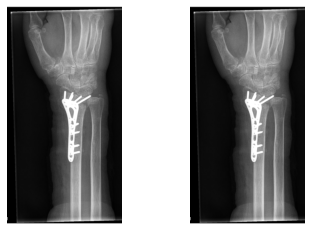

MEAN 85.49592513259894


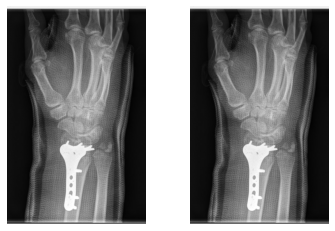

MEAN 128.45704659406636


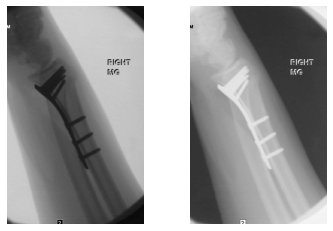

MEAN 41.20500341057832


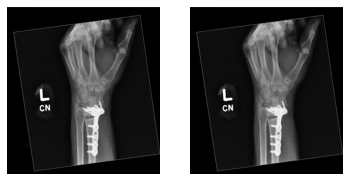

MEAN 43.0425038167939


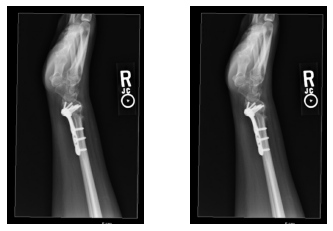

MEAN 126.70050700144857


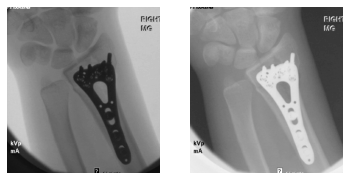

MEAN 175.24969613719614


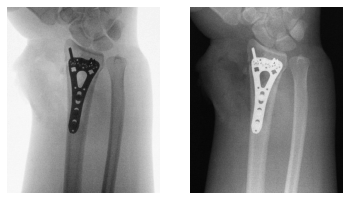

MEAN 56.38355795648623


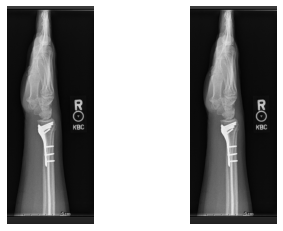

MEAN 132.79344277586046


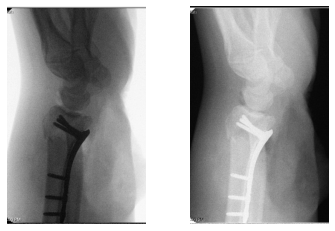

MEAN 41.7898720349563


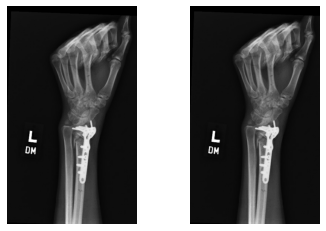

MEAN 82.00343979150817


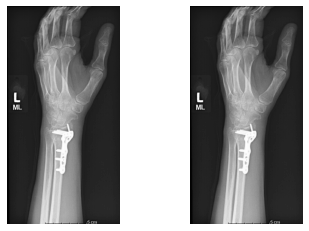

MEAN 50.15043195108984


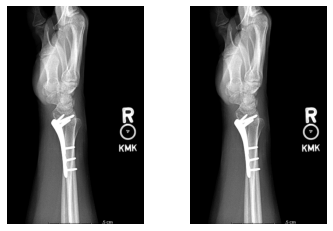

MEAN 166.35177858754122


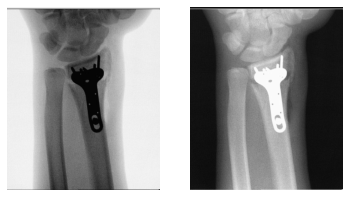

MEAN 92.76569242041846


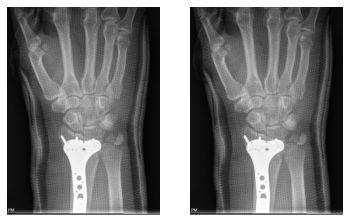

MEAN 234.43126245734942


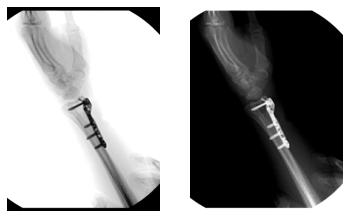

MEAN 63.19726987382684


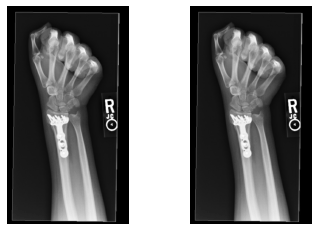

MEAN 75.66354321212594


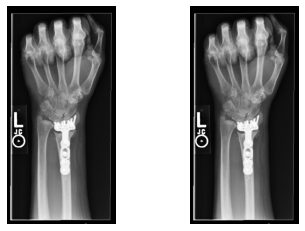

MEAN 178.94374577035867


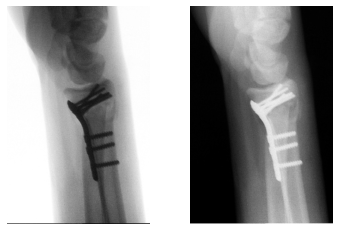

MEAN 54.42964222585192


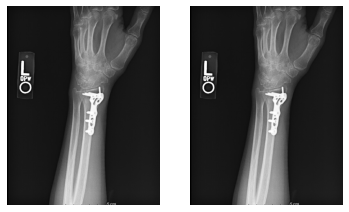

MEAN 51.21278426725354


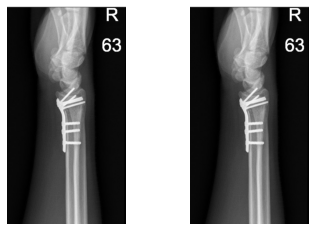

MEAN 45.34872412562456


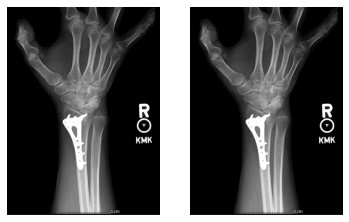

MEAN 60.062272808052086


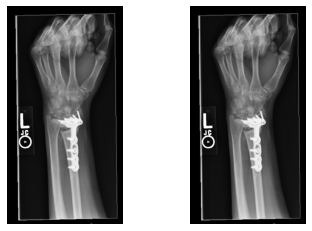

MEAN 181.81200770405792


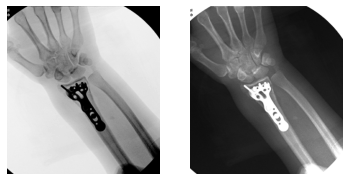

MEAN 151.50592843590556


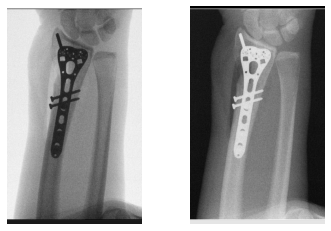

MEAN 95.81992303908804


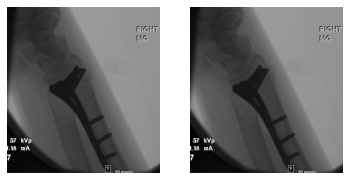

MEAN 180.20591689811937


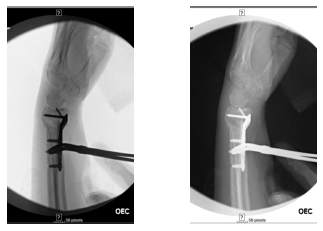

MEAN 83.34463314463315


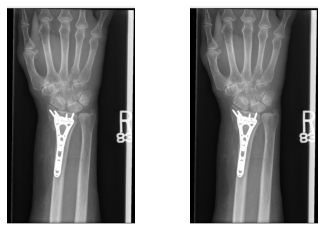

MEAN 88.78480545823345


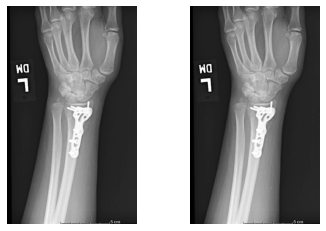

MEAN 182.26923804121762


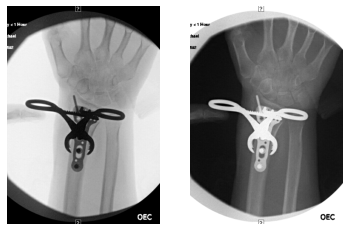

MEAN 174.10528199701196


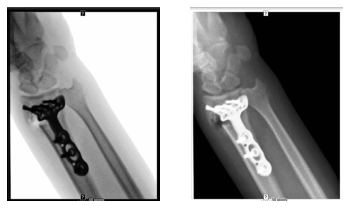

MEAN 58.399190358363214


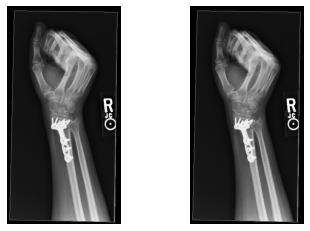

MEAN 37.20477470355731


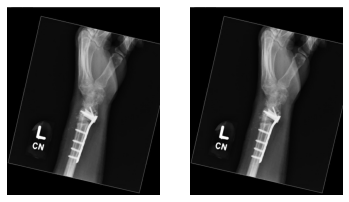

MEAN 171.9251864374083


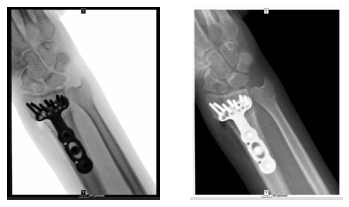

MEAN 91.94093900414443


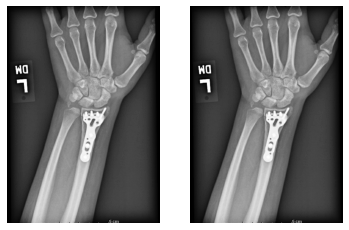

MEAN 53.50694763338266


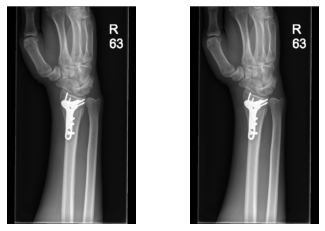

MEAN 72.02131568245242


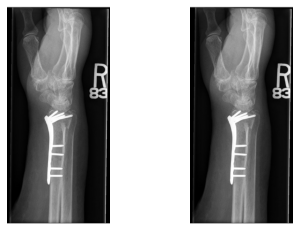

MEAN 70.34827840629612


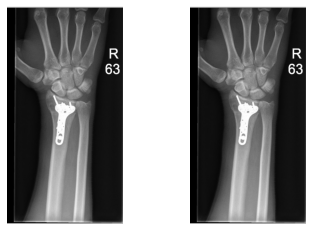

MEAN 122.2807336616166


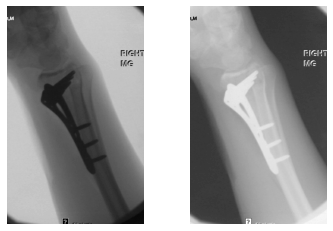

MEAN 67.76291079812206


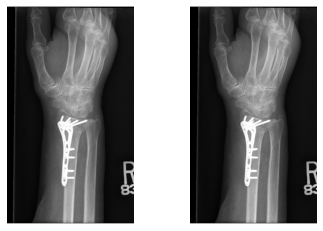

MEAN 33.27600888888889


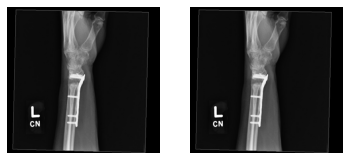

MEAN 58.661930231176086


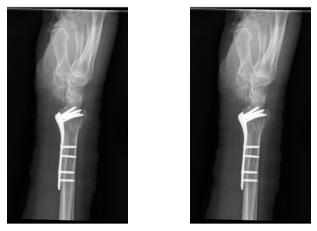

MEAN 82.21726195930385


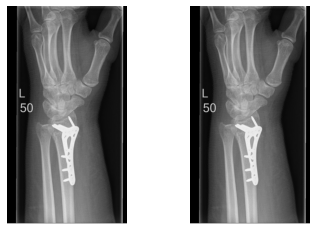

MEAN 68.98957437589574


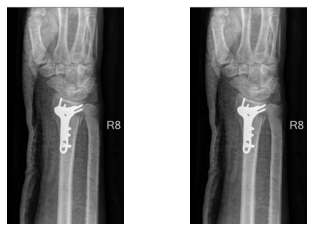

MEAN 69.98818303517099


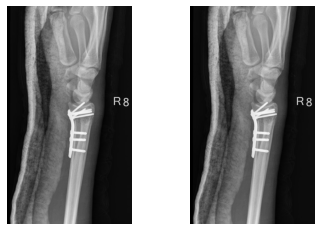

MEAN 55.624634502923975


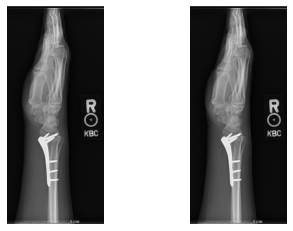

In [49]:
images = {}
edited_images = {}

for filepath in filepaths:
    image = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)



    # set crop bounds for background color detection
    x_min = 0
    x_max = image.shape[1]
    y_min = int(image.shape[0] * 0.2)
    y_max = int(image.shape[0] * 0.8)

    # recolored image (if black on white x-ray)
    cropped_image = image[y_min:y_max, x_min:x_max]
    
    recolored_image = image


    print("MEAN", np.mean(cropped_image))
    if np.mean(cropped_image) > 110:
        recolored_image = cv2.bitwise_not(image)


    edited = recolored_image
    edited_images[filepath] = edited




    f, axarr = plt.subplots(1,2)
    axarr[0].axis('off')
    axarr[0].imshow(image, cmap='gray')
    axarr[1].axis('off')
    axarr[1].imshow(edited, cmap='gray')
    plt.show()

## Now we actually try to preprocess the images

synthes va ex5 at 10.56.45 AM.png
45 10278.0 (126, 349, 106, 289)


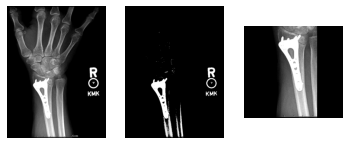

acumed ex3 at 9.58.41 AM.png
8 8678.5 (147, 257, 64, 385)


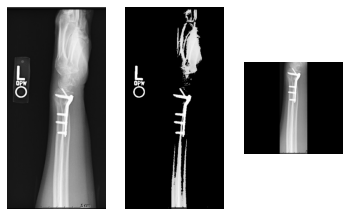

synthes va ex1-6 (1).png
98 10768.5 (117, 0, 139, 147)


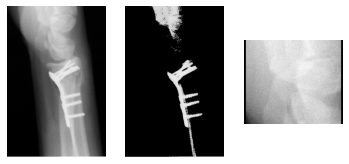

synthes va ex5 at 10.57.20 AM.png
45 10297.0 (123, 348, 106, 290)


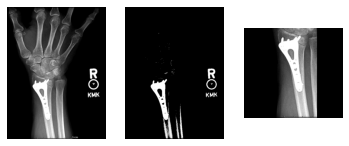

Acumed ex2 at 9.50.54 AM.png
23 3820.0 (172, 302, 62, 169)


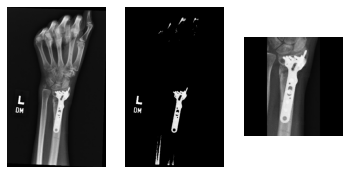

synthes va ex3 at 4.31.49 AM.png
5 3058.0 (147, 474, 69, 177)


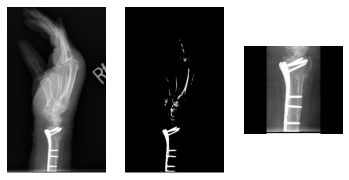

acumed ex5 at 10.25.26 AM.png
83 22680.5 (136, 25, 116, 585)


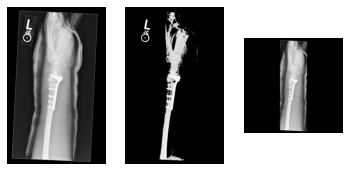

acumed ex5 at 10.25.57 AM.png
21 2091.0 (133, 302, 52, 174)


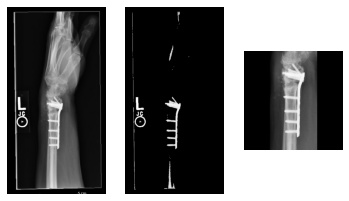

synthes va ex5 at 2.29.37 PM.png
10 17156.0 (118, 16, 179, 321)


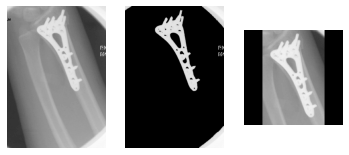

acumed ex5 at 10.25.02 AM.png
20 7308.5 (251, 255, 76, 218)


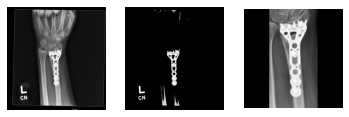

Acumed ex2 at 9.50.35 AM.png
33 7515.5 (235, 213, 76, 241)


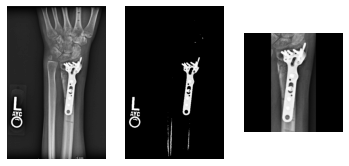

Acumed ex2 at 9.50.48 AM.png
38 15953.0 (208, 211, 96, 430)


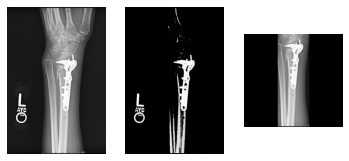

acumed ex1 at 9.47.24 AM.png
35 30347.5 (111, 4, 134, 629)


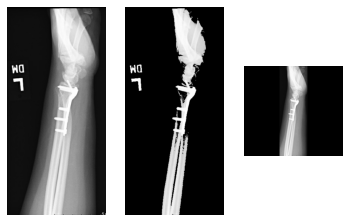

synthes va ex5 at 2.29.29 PM.png
14 11174.0 (209, 128, 164, 280)


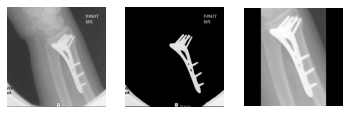

synthes va ex3 at 4.31.59 AM.png
3 4226.5 (176, 539, 129, 141)


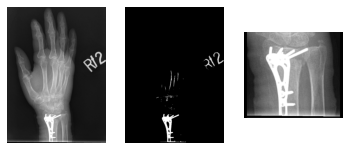

synthes va ex2 at 4.18.23 AM.png
24 7353.5 (185, 375, 75, 215)


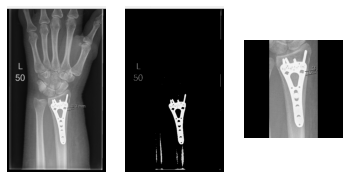

acumed ex3 at 9.58.16 AM.png
17 4268.5 (173, 372, 63, 161)


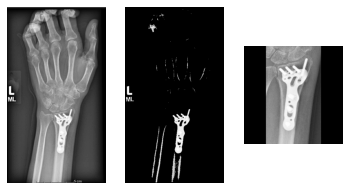

acumed ex3 at 9.57.42 AM.png
18 4271.5 (178, 372, 63, 161)


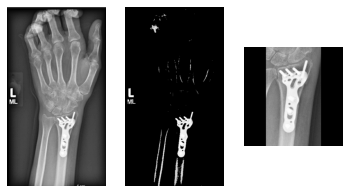

synthes va ex5 at 10.56.24 AM.png
4 4961.5 (137, 368, 63, 168)


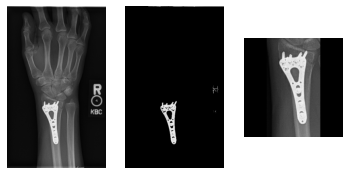

acumed ex3 at 9.58.32 AM.png
63 3786.0 (236, 277, 61, 151)


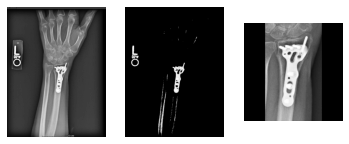

trimed va ex1 at 4.07.05 AM.png
30 4417.0 (198, 411, 79, 227)


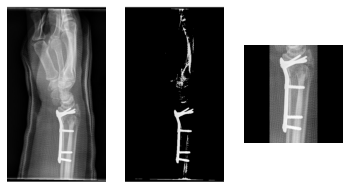

synthes va ex3 at 4.35.19 AM.png
77 957.5 (87, 568, 30, 63)


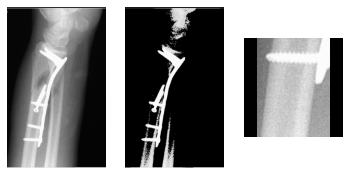

synthes va ex5 at 2.29.33 PM.png
17 11174.0 (208, 127, 164, 280)


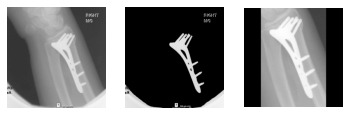

acumed ex5 at 10.25.06 AM.png
11 6380.5 (235, 262, 87, 220)


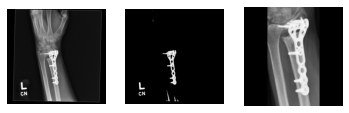

synthes va ex5 at 2.29.50 PM.png
27 911.5 (117, 343, 35, 45)


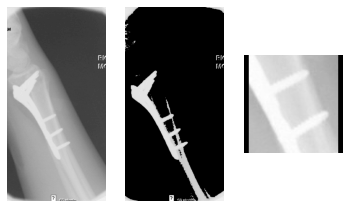

acumed ex5 at 10.25.22 AM.png
27 5138.0 (115, 409, 94, 204)


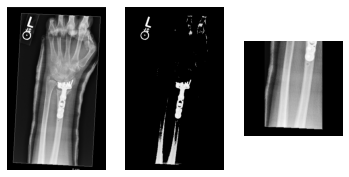

acumed ex5 at 10.13.29 AM.png
176 411.5 (54, 164, 54, 36)


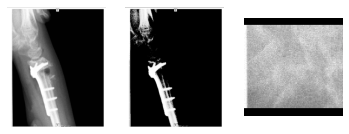

synthes va ex1-8.png
146 15546.5 (218, 180, 135, 290)


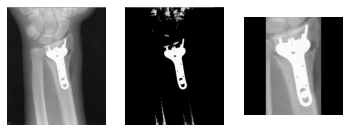

acumed ex3 at 9.58.28 AM.png
11 4290.0 (124, 366, 59, 264)


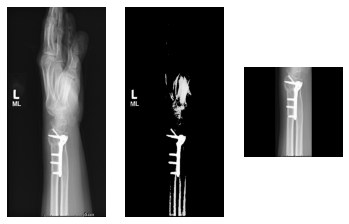

synthes va ex5 at 10.56.32 AM.png
1 4156.5 (85, 383, 72, 161)


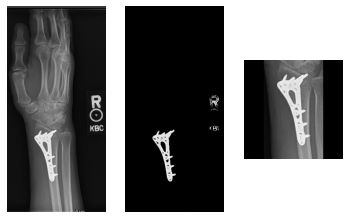

synthes va ex1-9.png
10 4497.5 (106, 318, 71, 162)


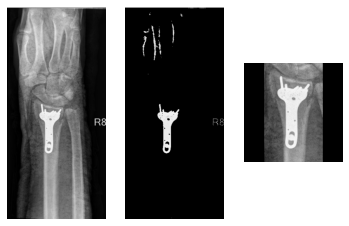

synthes va ex2 at 4.18.48 AM.png
31 2669.5 (140, 317, 63, 201)


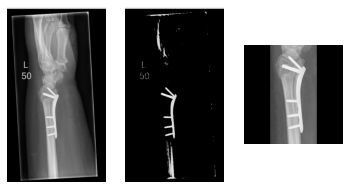

acumed ex5 at 10.24.34 AM.png
13 6025.0 (173, 355, 64, 250)


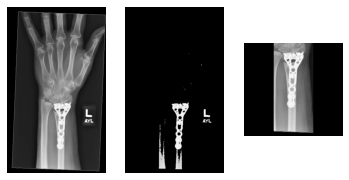

acumed ex5 at 10.24.38 AM.png
10 4759.5 (161, 366, 71, 244)


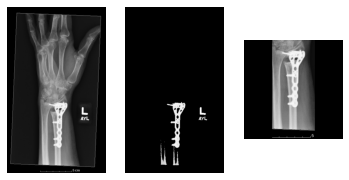

acumed ex5 at 10.24.45 AM.png
7 1729.5 (145, 283, 60, 177)


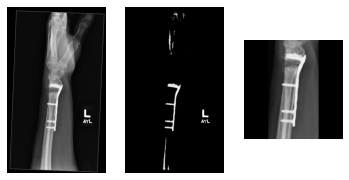

synthes va ex3 at 4.31.53 AM.png
8 3828.0 (249, 553, 81, 114)


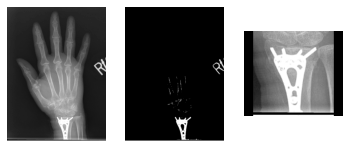

synthes va ex3 at 4.31.30 AM.png
9 8479.5 (167, 313, 96, 252)


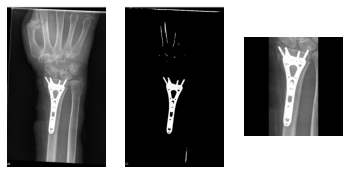

Acumed ex2 at 9.50.42 AM.png
13 7461.0 (202, 240, 76, 387)


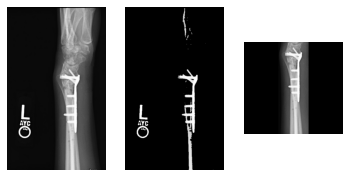

acumed ex5 at 10.25.16 AM.png
23 5101.5 (115, 397, 93, 201)


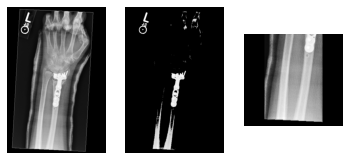

acumed ex1 at 2.22.39 PM.png
46 2505.0 (197, 256, 127, 148)


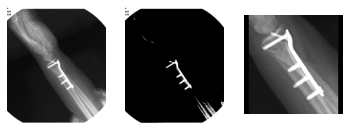

acumed ex5 at 10.25.20 AM.png
34 8626.0 (139, 309, 93, 310)


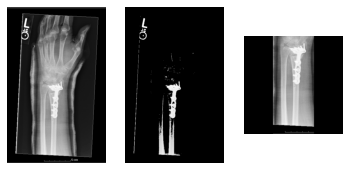

acumed ex5 at 10.25.32 AM.png
8 6510.5 (275, 273, 80, 214)


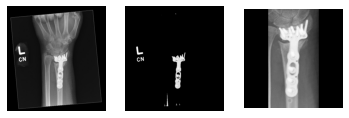

Acumed ex2 at 9.50.59 AM.png
25 1295.0 (119, 283, 50, 161)


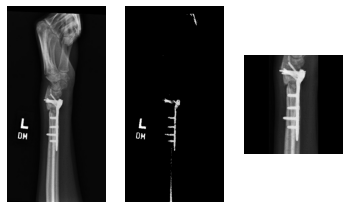

synthes va ex5 at 2.29.26 PM.png
12 8565.0 (0, 335, 169, 140)


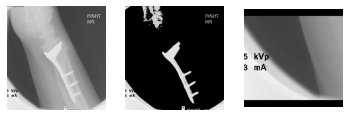

synthes va ex5 at 2.29.45 PM.png
32 18072.0 (100, 47, 160, 319)


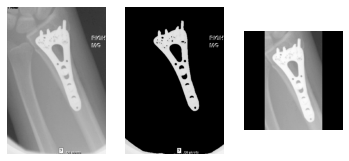

synthes va ex3 at 4.31.35 AM.png
20 6336.0 (179, 277, 95, 232)


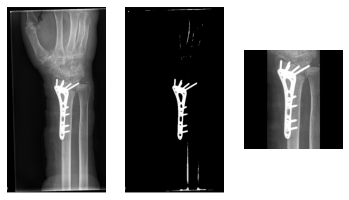

trimed va ex1 at 4.06.59 AM.png
32 9899.0 (173, 443, 114, 231)


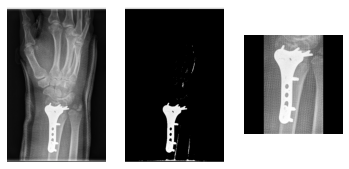

synthes va ex5 at 2.29.57 PM.png
21 7627.0 (73, 159, 173, 273)


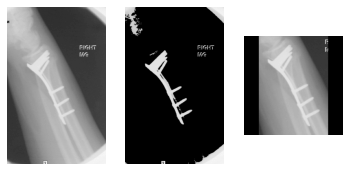

acumed ex5 at 10.25.37 AM.png
5 5050.0 (285, 357, 80, 206)


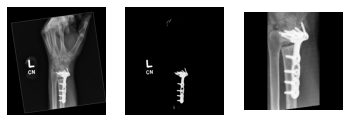

acumed ex5 at 10.13.53 AM.png
5 2440.0 (156, 275, 72, 153)


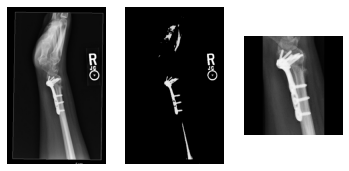

synthes va ex5 at 2.29.10 PM.png
21 18103.5 (189, 132, 164, 319)


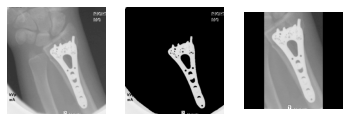

synthes va ex2 at 4.18.04 AM.png
172 2019.5 (267, 192, 77, 92)


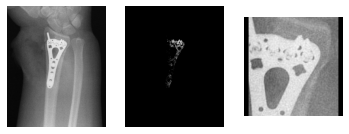

synthes va ex5 at 10.56.35 AM.png
11 2653.0 (95, 356, 52, 291)


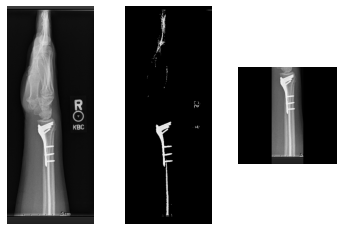

synthes va ex2 at 4.18.08 AM.png
613 4795.0 (131, 6, 81, 105)


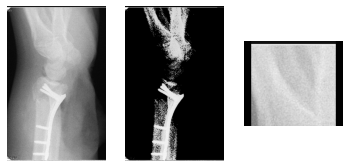

Acumed ex2 at 9.51.06 AM.png
7 3227.0 (179, 316, 64, 173)


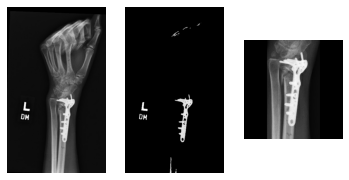

acumed ex3 at 9.58.23 AM.png
24 7280.0 (122, 341, 70, 291)


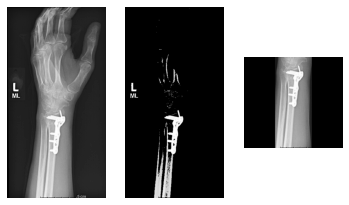

synthes va ex5 at 10.56.54 AM.png
155 8532.0 (97, 0, 110, 253)


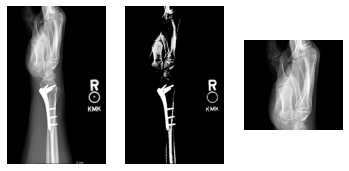

synthes va ex1-7.png
155 15861.0 (224, 178, 134, 289)


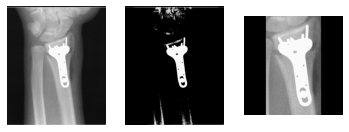

trimed va ex1 at 4.06.49 AM.png
40 285.5 (238, 636, 21, 20)


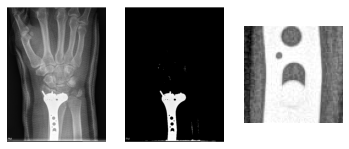

synthes va ex5 at 2.22.45 PM.png
11 1106.5 (216, 281, 62, 118)


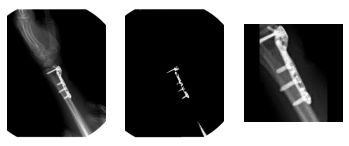

acumed ex5 at 10.13.43 AM.png
4 5637.0 (152, 448, 104, 163)


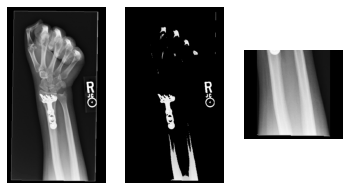

acumed ex5 at 10.25.48 AM.png
9 4362.0 (134, 312, 62, 170)


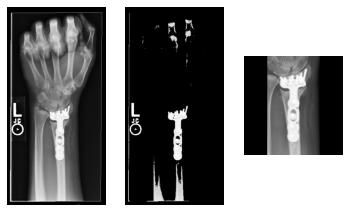

synthes va ex1-6.png
98 10768.5 (117, 0, 139, 147)


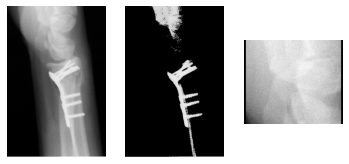

acumed ex3 at 9.58.37 AM.png
41 9719.5 (176, 253, 125, 370)


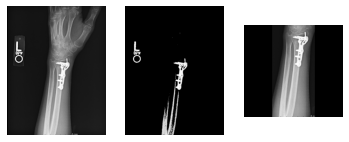

synthes va ex1-14.png
12 3541.0 (150, 247, 84, 195)


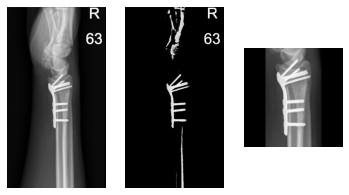

synthes va ex5 at 10.56.50 AM.png
33 6046.5 (170, 329, 75, 306)


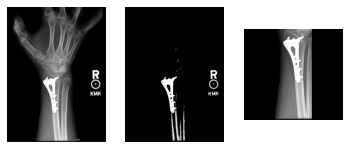

acumed ex5 at 10.25.52 AM.png
13 3839.0 (146, 299, 70, 174)


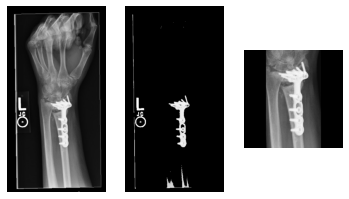

acumed ex1 at 2.22.36 PM.png
26 6109.0 (168, 238, 140, 155)


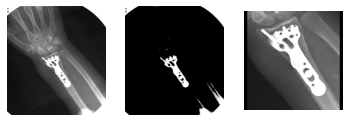

synthes va ex3 at 4.35.14 AM.png
91 17523.5 (135, 87, 123, 399)


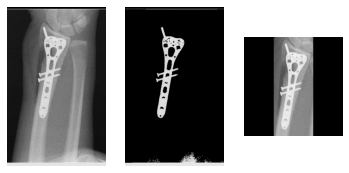

synthes va ex5 at 2.29.20 PM.png
30 101.0 (52, 519, 14, 12)


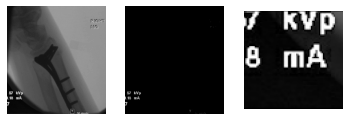

acumed ex3 at 2.19.58 PM.png
57 7168.0 (109, 301, 265, 188)


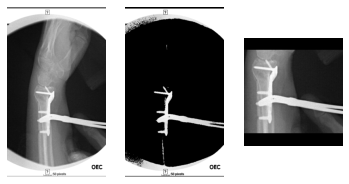

synthes va ex3 at 4.31.15 AM.png
45 6679.0 (138, 340, 83, 222)


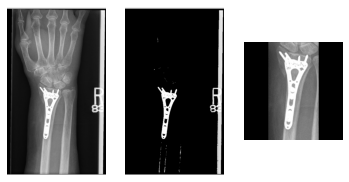

acumed ex1 at 9.47.19 AM.png
32 15098.0 (105, 274, 140, 354)


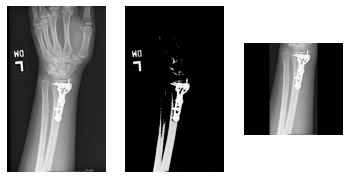

acumed ex3 at 2.20.05 PM.png
69 9238.5 (60, 269, 270, 150)


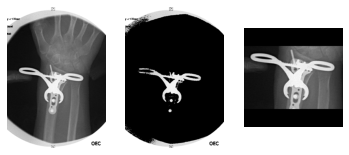

acumed ex5 at 10.13.34 AM.png
136 14520.0 (52, 291, 216, 266)


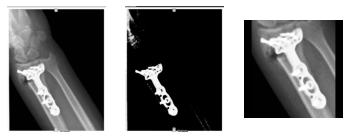

acumed ex5 at 10.13.49 AM.png
9 2631.5 (125, 315, 63, 127)


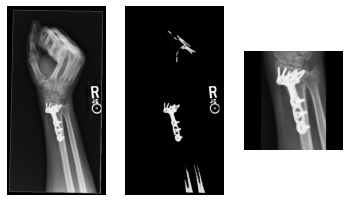

acumed ex5 at 10.25.42 AM.png
5 2472.0 (203, 331, 96, 187)


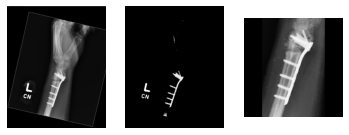

acumed ex5 at 10.13.38 AM.png
125 16551.0 (63, 295, 223, 264)


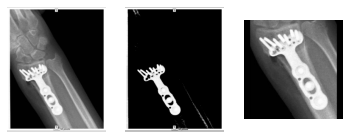

acumed ex1 at 9.47.15 AM.png
15 4756.0 (212, 295, 76, 158)


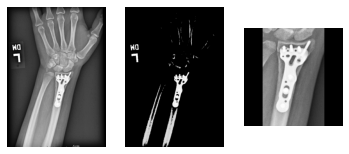

synthes va ex1-13.png
19 3865.5 (175, 280, 77, 154)


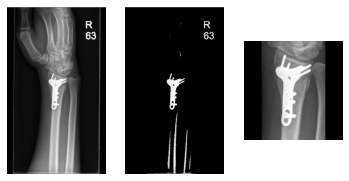

synthes va ex3 at 4.31.19 AM.png
9 4411.5 (122, 341, 90, 242)


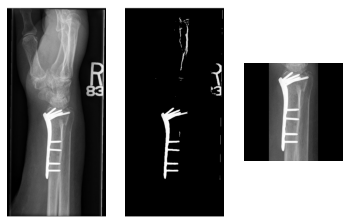

synthes va ex1-12.png
27 4441.5 (152, 292, 72, 163)


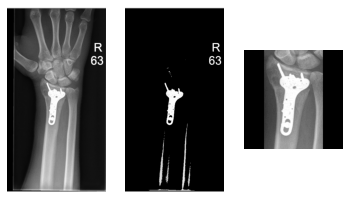

synthes va ex5 at 2.29.53 PM.png
23 20239.0 (87, 165, 262, 392)


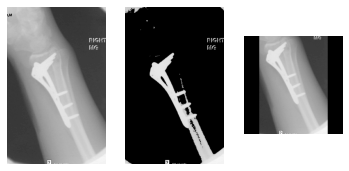

synthes va ex3 at 4.31.23 AM.png
21 6201.5 (165, 357, 97, 230)


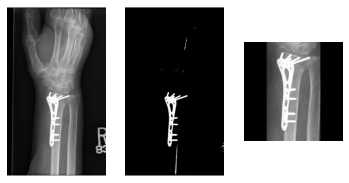

acumed ex5 at 10.25.09 AM.png
6 3593.0 (243, 274, 76, 316)


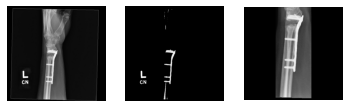

synthes va ex3 at 4.31.40 AM.png
3 4833.5 (157, 328, 93, 272)


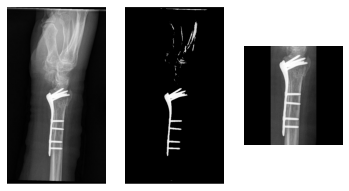

synthes va ex2 at 4.18.36 AM.png
35 409.0 (193, 419, 15, 44)


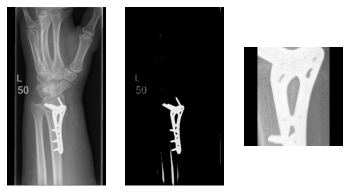

synthes va ex1-10.png
11 5115.0 (148, 287, 89, 176)


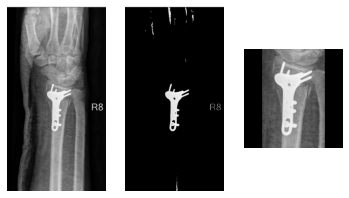

synthes va ex1-11.png
4 3191.5 (193, 305, 82, 177)


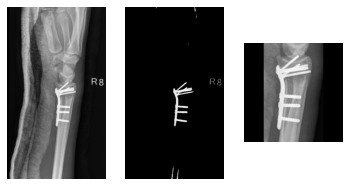

synthes va ex5 at 10.56.40 AM.png
20 2475.5 (91, 373, 60, 158)


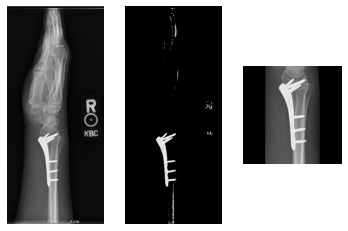

In [55]:
for filepath, image in edited_images.items():
    filepath = filepath.split("/")[-1]
    # print(image)
    print(filepath)

    # 1. Thresholding
    ret, thresh = cv2.threshold(image, 200, 255, cv2.THRESH_TOZERO)

    # 2. Morphological operations
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE , (3,3))
    morph = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # 3. Find contours
    contours, hierarchy = cv2.findContours(morph, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # 4. Find the biggest contour
    # NOTE: the if statement filters out contours that are more than 80% of the width of the image
    areas = [cv2.contourArea(c) if cv2.boundingRect(c)[2] < (image.shape[1]) * 0.8 else -1 for c in contours]
    max_index = np.argmax(areas)
    cnt = contours[max_index]
    print(max_index, areas[max_index], cv2.boundingRect(cnt))

    # 5. Find the bounding rectangle and draw it
    colored_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    x, y, w, h = cv2.boundingRect(cnt)
    cv2.rectangle(colored_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

    img_contours = np.zeros(colored_image.shape)
    # draw the contours on the empty image
    cv2.drawContours(img_contours, contours, -1, (0,255,0), 3)

    # 6. Crop to the bounding rectangle with border of 30 pixels
    lower_bound = 0 if y < 30 else y - 30
    upper_bound = y + h + 30 if y + h + 30 < image.shape[0] else image.shape[0]
    left_bound = 0 if x < 30 else x - 30
    right_bound = x + w + 30 if x + w + 30 < image.shape[1] else image.shape[1]
    crop_img = image[lower_bound:upper_bound, left_bound:right_bound]

    # # 7. Resize to square
    larger_dimension = max(w, h)
    y_diff = larger_dimension - h
    y_pad = y_diff / 2 if y_diff > 0 else 0
    x_diff = larger_dimension - w
    x_pad = x_diff / 2 if x_diff > 0 else 0
    crop_img = cv2.copyMakeBorder(crop_img, int(y_pad), int(y_pad), int(x_pad), int(x_pad), cv2.BORDER_CONSTANT, value=[0,0,0])

    # 8. Save the image
    cv2.imwrite("./images/cropped/" + filepath, crop_img)
    
    




    # display the resulting frame
    f, axarr = plt.subplots(1,3)
    axarr[0].axis('off')
    axarr[0].imshow(image, cmap='gray')
    axarr[1].axis('off')
    axarr[1].imshow(thresh, cmap='gray')
    # axarr[2].axis('off')
    # axarr[2].imshow(img_contours, cmap='gray')
    axarr[2].axis('off')
    axarr[2].imshow(crop_img, cmap='gray')
    plt.show()
